Best total profit: 72434.0
Iteration number: 1
Total weight of selected items: 72434.0
Total capacity: 1500

Best total profit: 72434.0
Iteration number: 2
Total weight of selected items: 72434.0
Total capacity: 1500

Best total profit: 72434.0
Iteration number: 3
Total weight of selected items: 72434.0
Total capacity: 1500

Best total profit: 72434.0
Iteration number: 4
Total weight of selected items: 72434.0
Total capacity: 1500

Best total profit: 72434.0
Iteration number: 5
Total weight of selected items: 72434.0
Total capacity: 1500

Best total profit: 72434.0
Iteration number: 6
Total weight of selected items: 72434.0
Total capacity: 1500

Best total profit: 72434.0
Iteration number: 7
Total weight of selected items: 72434.0
Total capacity: 1500

Best total profit: 72434.0
Iteration number: 8
Total weight of selected items: 72434.0
Total capacity: 1500

Best total profit: 72434.0
Iteration number: 9
Total weight of selected items: 72434.0
Total capacity: 1500

Best total profit: 

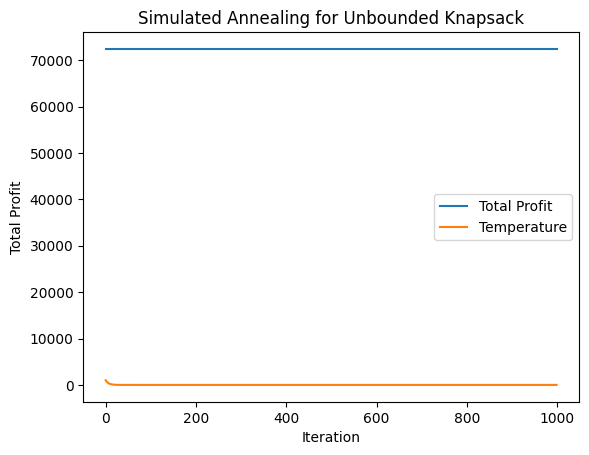

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

class SimulatedAnnealing:
    def __init__(self, capacity, data, alpha):
        self.capacity = capacity
        self.data = data
        self.best_solution = None
        self.best_profit = 0
        self.alpha = alpha

    def solve(self, minimum_temperature, maximum_temperature):
        temperature = maximum_temperature
        iteration_number = 1  # Add an iteration number counter
        
        # Generate a random initial solution
        self.best_solution = self.generate_random_solution()

        # Calculate the profit of the initial solution
        self.best_profit = self.get_profit(self.best_solution)

        while temperature > minimum_temperature:
            # Generate a random neighbour solution
            neighbour = self.generate_neighbour()

            # Calculate the change in profit
            change_in_profit = self.get_change_in_profit(neighbour)

            # Accept or reject the neighbour solution
            if change_in_profit > 0:
                self.best_solution = neighbour
                self.best_profit = self.get_profit(neighbour)
            elif random.uniform(0, 1) < np.exp(change_in_profit / temperature):
                self.best_solution = neighbour
                self.best_profit = self.get_profit(neighbour)

            # Decrease the temperature
            temperature *= self.alpha

            # Call the print_iteration_info method
            self.print_iteration_info(iteration_number, self.best_solution)
            iteration_number += 1

        return self.best_solution

    def generate_random_solution(self):
        # Generate a random initial solution
        solution = self.data.copy()
        for i in range(len(solution)):
            random_quantity = np.random.randint(0, self.capacity + 1)
            solution[i, 1] = random_quantity
        return solution
    def generate_neighbour(self):
        # Randomly choose an item to modify
        item_to_modify = np.random.choice(self.data[:, 0])  # Select the first column

        # Adjust the quantity of the selected item
        neighbour = self.data.copy()
        idx = np.where(neighbour[:, 0] == item_to_modify)[0]
        if len(idx) > 0:
            random_quantity = np.random.randint(0, self.capacity + 1)  # Select a random quantity
            neighbour[idx, 1] = random_quantity  # Update the quantity

        return neighbour

    def get_profit(self, solution):
        # Calculate the profit of the new solution
        new_profit = np.sum(solution[:, 1])  # Sum the values (second column)

        return new_profit

    def get_change_in_profit(self, neighbour):
        # Calculate the change in profit
        change_in_profit = self.get_profit(neighbour) - self.best_profit

        return change_in_profit

    def print_iteration_info(self, iteration_number, solution):
        total_weight = np.sum(solution[:, 1])  # Sum the weights (second column)
        print("Best total profit:", self.best_profit)
        print("Iteration number:", iteration_number)
        print("Total weight of selected items:", total_weight)
        print("Total capacity:", self.capacity)
        print("")

def main():
    # Read the knapsack data from the CSV file
    data = np.genfromtxt("knapsack.csv", delimiter=",", skip_header=1)

    # Set the capacity of the knapsack
    capacity = 1500

    # Set the minimum temperature, alpha, and maximum temperature
    minimum_temperature = 0.01
    alpha = 0.85
    maximum_temperature = 1000

    # Create the Simulated Annealing object
    solver = SimulatedAnnealing(capacity=capacity, data=data, alpha=alpha)

    # Solve the knapsack problem
    solution = solver.solve(minimum_temperature, maximum_temperature)

    # Plot the changes in solution value and temperature over a number of iterations
    iterations = 1000
    solutions = [solution.copy() for _ in range(iterations)]  # Store best solutions at each iteration
    temperatures = []
    for i in range(iterations):
        temperatures.append(maximum_temperature)
        maximum_temperature *= alpha

    # Extract x and y coordinates
    x = np.arange(iterations)
    y_profits = [solver.get_profit(solution) for solution in solutions]

    plt.plot(x, y_profits, label="Total Profit")
    plt.plot(x, temperatures, label="Temperature")
    plt.xlabel("Iteration")
    plt.ylabel("Total Profit")
    plt.title("Simulated Annealing for Unbounded Knapsack")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()
